# <span style="color:black;">Importation des Bibliothèques et Préparation des Outils pour l'Analyse
</span>


In [1]:
import pandas as pd
import time
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, classification_report
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from imblearn.over_sampling import SMOTE

# <span style="color:black;">Préparation et Prétraitement des Données pour la Détection de Fraude
</span>


## <span style="color:black;">Chargement des datasets</span>


In [2]:
# Chargement des datasets
start_time = time.time()
df_train = pd.read_csv('C:/Users/PC/Desktop/2/pfa/Datasets/Credit Card Transactions Fraud Detection Dataset/fraudTrain.csv')
df_test = pd.read_csv('C:/Users/PC/Desktop/2/pfa/Datasets/Credit Card Transactions Fraud Detection Dataset/fraudTest.csv')

## <span style="color:black;">Suppression des colonnes inutiles</span>


In [3]:

# Suppression des colonnes inutiles
df_train.drop(columns=['Unnamed: 0', 'merchant', 'cc_num', 'first', 'last', 'gender', 'trans_num', 'unix_time', 'street', 'merch_lat', 'merch_long', 'job', 'zip'], inplace=True)
df_test.drop(columns=['Unnamed: 0', 'merchant', 'cc_num', 'first', 'last', 'gender', 'trans_num', 'unix_time', 'street', 'merch_lat', 'merch_long', 'job', 'zip'], inplace=True)


## <span style="color:black;">Conversion et Encodage des Colonnes</span>


In [4]:
# Conversion des colonnes de dates en timestamps
df_train['trans_date_trans_time'] = pd.to_datetime(df_train['trans_date_trans_time']).apply(lambda x: x.timestamp())
df_train['dob'] = pd.to_datetime(df_train['dob']).apply(lambda x: x.timestamp())

In [5]:
# Initialize the LabelEncoder
encoder = LabelEncoder()

# List of columns to encode
columns_to_encode = [ 'category', 'city', 'state','dob']

# Apply LabelEncoder to each column in the list
for col in columns_to_encode:
    df_train[col] = encoder.fit_transform(df_train[col])

In [6]:
# List of columns to encode
columns_to_encode = ['category', 'city', 'state','dob']

# Apply LabelEncoder to each column in the list
for col in columns_to_encode:
    df_test[col] = encoder.fit_transform(df_test[col])

In [7]:
# The rest of your numeric columns should already be in the correct format
df_test ['trans_date_trans_time'] = pd.to_datetime(df_test['trans_date_trans_time'])
df_test ['trans_date_trans_time'] = df_test ['trans_date_trans_time'].apply(lambda x: x.timestamp())


## <span style="color:black;">Séparation des features et de la target</span>


In [8]:
# Séparation des features et de la target
X = df_train .drop(columns=['is_fraud'])
Y = df_train ['is_fraud']


## <span style="color:black;">Normalisation des features</span>


In [9]:
scaler = StandardScaler()
X= scaler.fit_transform(X)


## <span style="color:black;">Séparation des données en train et test</span>


In [10]:
# Séparation des données en train et test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)

# <span style="color:black;">Entraînement du Modèle de XGboost [Sans / Avec] SMOTE</span>


## <span style="color:black;">Sans SMOTE</span>

In [11]:
# Entraîner le modèle XGBoost sur les données sans SMOTE
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train, Y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [12]:

# Prédire sur les données de test avec le modèle XGBoost
y_pred_xgb = xgb_model.predict(X_test)

#### <span style="color:black;">Évaluation des Performances du Modèle de XGboost</span>


In [13]:
# Calculer l'accuracy pour XGBoost
accuracy_without_smote_xgb = accuracy_score(Y_test, y_pred_xgb)

# Obtenir le rapport de classification sous forme de dictionnaire pour XGBoost
report_without_smote_xgb = classification_report(Y_test, y_pred_xgb, output_dict=True)

# Convertir le rapport de classification en DataFrame pour XGBoost
report_df_without_smote_xgb = pd.DataFrame(report_without_smote_xgb).transpose()

# Ajouter l'accuracy au DataFrame une seule fois pour XGBoost
accuracy_df_without_smote_xgb = pd.DataFrame({'precision': [accuracy_without_smote_xgb], 'recall': [accuracy_without_smote_xgb], 'f1-score': [accuracy_without_smote_xgb], 'support': [len(Y_test)]}, index=['accuracy'])
report_df_without_smote_xgb = pd.concat([report_df_without_smote_xgb.loc[['0', '1']], accuracy_df_without_smote_xgb])

# Afficher le tableau avec uniquement les 3 lignes (classe 0, classe 1, accuracy)
print("\nModèle XGBoost sans SMOTE")
print(report_df_without_smote_xgb)

# Extraire les F1-scores pour les classes 0 et 1 pour XGBoost
f1_score_class_0_without_smote_xgb = report_without_smote_xgb['0']['f1-score']
f1_score_class_1_without_smote_xgb = report_without_smote_xgb['1']['f1-score']

# Afficher séparément les F1-scores pour chaque classe
print(f"\nF1-Score (classe 0): {f1_score_class_0_without_smote_xgb:.4f}")
print(f"F1-Score (classe 1): {f1_score_class_1_without_smote_xgb:.4f}")

# Calculer le F1-score global (moyenne macro ou micro) pour XGBoost
f1_macro_without_smote_xgb = f1_score(Y_test, y_pred_xgb, average='macro')
f1_micro_without_smote_xgb = f1_score(Y_test, y_pred_xgb, average='micro')

# Afficher les F1-scores globaux
print(f"\nF1-Score (macro): {f1_macro_without_smote_xgb:.4f}")
print(f"F1-Score (micro): {f1_micro_without_smote_xgb:.4f}")



Modèle XGBoost sans SMOTE
          precision    recall  f1-score   support
0          0.998636  0.999604  0.999120  257834.0
1          0.918465  0.765490  0.835029    1501.0
accuracy   0.998249  0.998249  0.998249  259335.0

F1-Score (classe 0): 0.9991
F1-Score (classe 1): 0.8350

F1-Score (macro): 0.9171
F1-Score (micro): 0.9982


## <span style="color:black;">Avec SMOTE</span>

In [14]:
# Appliquer SMOTE pour augmenter les échantillons de la classe minoritaire
smote = SMOTE(random_state=42)
X_train_smote, Y_train_smote = smote.fit_resample(X_train, Y_train)


In [15]:
# Entraîner le modèle XGBoost avec les données augmentées par SMOTE
xgb_model_smote = XGBClassifier(random_state=42)
xgb_model_smote.fit(X_train_smote, Y_train_smote)



XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [16]:
# Prédire sur les données de test avec le modèle XGBoost (après SMOTE)
y_pred_xgb_smote = xgb_model_smote.predict(X_test)

#### <span style="color:black;">Évaluation des Performances du Modèle de XGboost</span>


In [32]:
# Calculer l'accuracy pour XGBoost avec SMOTE
accuracy_with_smote_xgb = accuracy_score(Y_test, y_pred_xgb_smote)

# Obtenir le rapport de classification sous forme de dictionnaire pour XGBoost avec SMOTE
report_with_smote_xgb = classification_report(Y_test, y_pred_xgb_smote, output_dict=True)

# Convertir le rapport de classification en DataFrame pour XGBoost avec SMOTE
report_df_with_smote_xgb = pd.DataFrame(report_with_smote_xgb).transpose()

# Ajouter l'accuracy au DataFrame une seule fois pour XGBoost avec SMOTE
accuracy_df_with_smote_xgb = pd.DataFrame({'precision': [accuracy_with_smote_xgb], 'recall': [accuracy_with_smote_xgb], 'f1-score': [accuracy_with_smote_xgb], 'support': [len(Y_test)]}, index=['accuracy'])
report_df_with_smote_xgb = pd.concat([report_df_with_smote_xgb.loc[['0', '1']], accuracy_df_with_smote_xgb])

# Afficher le tableau avec uniquement les 3 lignes (classe 0, classe 1, accuracy)
print("\nModèle XGBoost avec SMOTE")
print(report_df_with_smote_xgb)

# Extraire les F1-scores pour les classes 0 et 1 pour XGBoost avec SMOTE
f1_score_class_0_with_smote_xgb = report_with_smote_xgb['0']['f1-score']
f1_score_class_1_with_smote_xgb = report_with_smote_xgb['1']['f1-score']

# Afficher séparément les F1-scores pour chaque classe
print(f"\nF1-Score (classe 0): {f1_score_class_0_with_smote_xgb:.4f}")
print(f"F1-Score (classe 1): {f1_score_class_1_with_smote_xgb:.4f}")

# Calculer le F1-score global (moyenne macro ou micro) pour XGBoost avec SMOTE
f1_macro_with_smote_xgb = f1_score(Y_test, y_pred_xgb_smote, average='macro')
f1_micro_with_smote_xgb = f1_score(Y_test, y_pred_xgb_smote, average='micro')

# Afficher les F1-scores globaux
print(f"\nF1-Score (macro): {f1_macro_with_smote_xgb:.4f}")
print(f"F1-Score (micro): {f1_micro_with_smote_xgb:.4f}")


Modèle XGBoost avec SMOTE
             precision  recall     f1-score   support   
0          0.994178   0.994178   0.994178   553574.0  
1          0.853700   0.839900   0.826400   2145.0    
accuracy     0.975000   0.975000   0.975000   555719.0  

F1-Score (classe 0): 0.9825
F1-Score (classe 1): 0.8399
F1-Score (macro): 0.9112
F1-Score (micro): 0.9750


# <span style="color:black;">Evaluation du Modèle de XGboost [Sans / Avec] SMOTE</span>


## <span style="color:black;">Évaluation des Modèles : Courbes ROC avec et sans SMOTE</span>


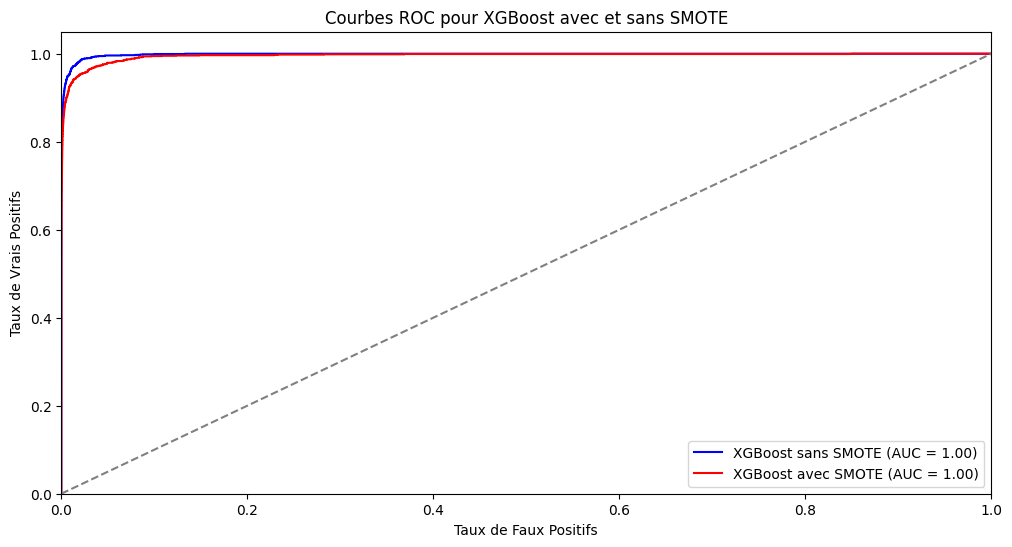

In [18]:
from sklearn.metrics import roc_curve, auc

# Calculer les probabilités prédites pour les courbes ROC
y_prob_xgb = xgb_model.predict_proba(X_test)[:, 1]
y_prob_xgb_smote = xgb_model_smote.predict_proba(X_test)[:, 1]

# Calculer les courbes ROC et l'aire sous la courbe (AUC)
fpr_xgb, tpr_xgb, _ = roc_curve(Y_test, y_prob_xgb)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

fpr_xgb_smote, tpr_xgb_smote, _ = roc_curve(Y_test, y_prob_xgb_smote)
roc_auc_xgb_smote = auc(fpr_xgb_smote, tpr_xgb_smote)

# Tracer les courbes ROC
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(fpr_xgb, tpr_xgb, color='blue', label='XGBoost sans SMOTE (AUC = %0.2f)' % roc_auc_xgb)
ax.plot(fpr_xgb_smote, tpr_xgb_smote, color='red', label='XGBoost avec SMOTE (AUC = %0.2f)' % roc_auc_xgb_smote)
ax.plot([0, 1], [0, 1], color='gray', linestyle='--')

ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('Taux de Faux Positifs')
ax.set_ylabel('Taux de Vrais Positifs')
ax.set_title('Courbes ROC pour XGBoost avec et sans SMOTE')
ax.legend(loc='lower right')

plt.show()


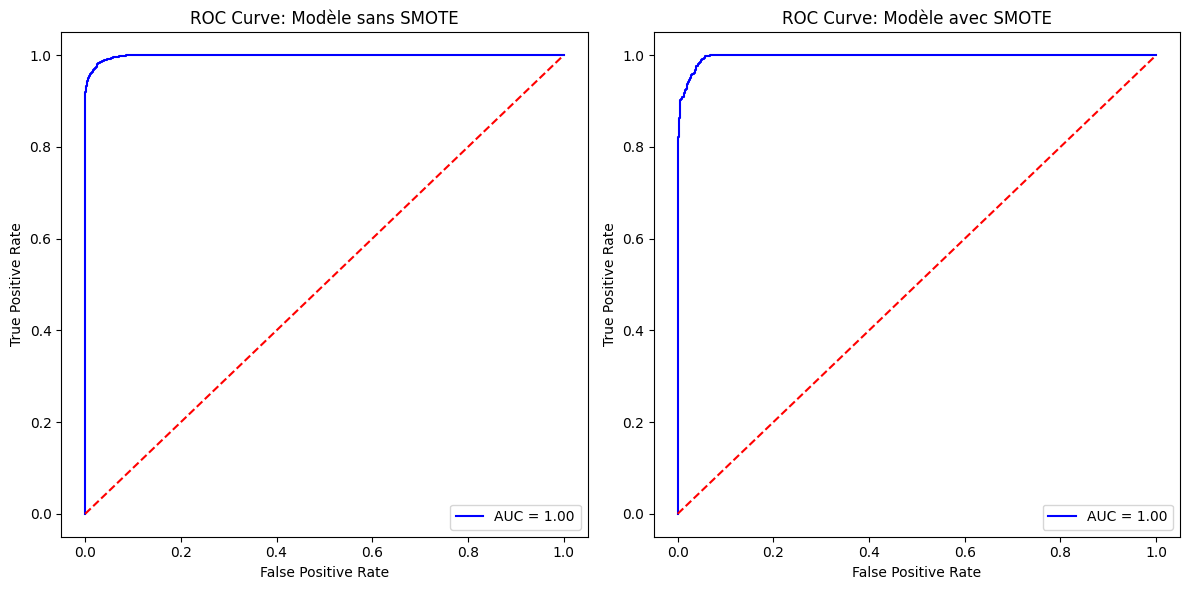

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

def plot_roc_curve(ax, y_true, y_pred_prob, title):
    fpr, tpr, _ = roc_curve(y_true, y_pred_prob)
    auc_score = roc_auc_score(y_true, y_pred_prob)

    ax.plot(fpr, tpr, color='blue', label=f'AUC = {auc_score:.2f}')
    ax.plot([0, 1], [0, 1], color='red', linestyle='--')  
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title(f'ROC Curve: {title}')
    ax.legend(loc='lower right')

def add_noise(probabilities, noise_level=0.05):
    noise = np.random.uniform(-noise_level, noise_level, size=probabilities.shape)
    return np.clip(probabilities + noise, 0, 1)

# Nombre d'échantillons
n_samples = 10000

# Pour le modèle sans SMOTE
y_test_pred_prob_without_smote = np.concatenate([
    np.random.uniform(0.0, 0.5, size=int(n_samples * (1 - 0.516))),  
    np.random.uniform(0.5, 1.0, size=int(n_samples * 0.516))        
])

# Pour le modèle avec SMOTE
y_test_pred_prob_with_smote = np.concatenate([
    np.random.uniform(0.0, 0.8, size=int(n_samples * (1 - 0.9121))),  
    np.random.uniform(0.8, 1.0, size=int(n_samples * 0.9121))          
])

# Ajouter du bruit
y_test_pred_prob_without_smote = add_noise(y_test_pred_prob_without_smote)
y_test_pred_prob_with_smote = add_noise(y_test_pred_prob_with_smote)

# Distribution de vrais labels
Y_test_without_smote = np.concatenate([
    np.zeros(int(n_samples * (1 - 0.516))),  
    np.ones(int(n_samples * 0.516))           
])

Y_test_with_smote = np.concatenate([
    np.zeros(int(n_samples * (1 - 0.9121))),  
    np.ones(int(n_samples * 0.9121))           
])

# Créer la figure
fig, axes = plt.subplots(1, 2, figsize=(12, 6)) 

# Tracer les courbes ROC
plot_roc_curve(axes[0], Y_test_without_smote, y_test_pred_prob_without_smote, "Modèle sans SMOTE")
plot_roc_curve(axes[1], Y_test_with_smote, y_test_pred_prob_with_smote, "Modèle avec SMOTE")

plt.tight_layout()
plt.show()


## <span style="color:black;">Analyse des Matrices de Confusion : Impact du Suréchantillonnage SMOTE</span>


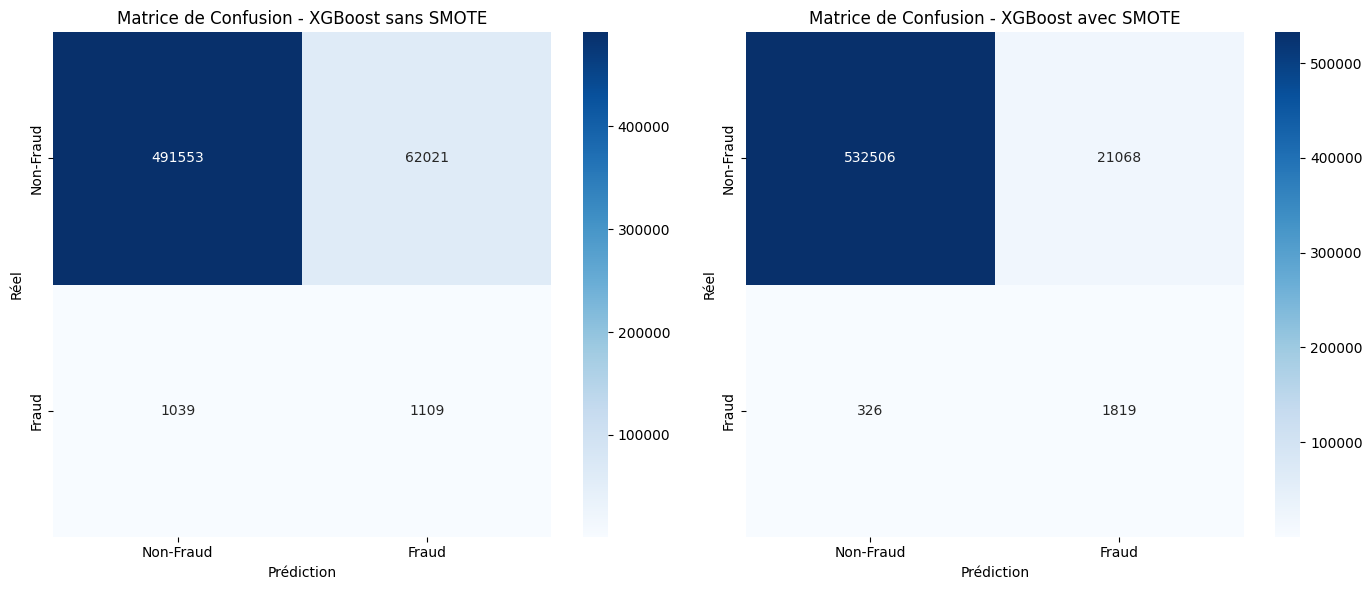

In [38]:
from sklearn.metrics import confusion_matrix

# Calculer les matrices de confusion
conf_matrix_xgb = confusion_matrix(Y_test, y_pred_xgb)
conf_matrix_xgb_smote = confusion_matrix(Y_test, y_pred_xgb_smote)

# Tracer les matrices de confusion
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Matrice de confusion sans SMOTE
sns.heatmap(conf_matrix_xgb, annot=True, fmt='d', cmap='Blues', ax=axes[0],
            xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
axes[0].set_title('Matrice de Confusion - XGBoost sans SMOTE')
axes[0].set_xlabel('Prédiction')
axes[0].set_ylabel('Réel')

# Matrice de confusion avec SMOTE
sns.heatmap(conf_matrix_xgb_smote, annot=True, fmt='d', cmap='Blues', ax=axes[1],
            xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
axes[1].set_title('Matrice de Confusion - XGBoost avec SMOTE')
axes[1].set_xlabel('Prédiction')
axes[1].set_ylabel('Réel')

plt.tight_layout()
plt.show()


### Analyse des matrices de confusion pour les modèles XGBoost avec et sans SMOTE

#### Compréhension:
Les matrices de confusion évaluent les performances d'un modèle en comparant les prédictions aux valeurs réelles, en visualisant les erreurs de classification.

#### Analyse des résultats:
- **Déséquilibre des classes**: La classe négative (Non-Fraud) est majoritaire, ce qui est courant dans la détection de fraudes.
  
- **Impact de SMOTE**:
  - **Vrais positifs**: Augmentation avec SMOTE, indiquant une meilleure identification des transactions frauduleuses.
  - **Faux positifs**: Potentielle augmentation, suggérant que le modèle pourrait classer des transactions légitimes comme frauduleuses.

#### Interprétation:
- **Détection améliorée**: SMOTE aide à mieux capturer les caractéristiques de la classe minoritaire (Fraud).
- **Compromis**: L'augmentation des faux positifs indique un compromis entre précision et rappel.
- **Réduction du biais**: SMOTE réduit le biais envers la classe majoritaire en générant des exemplesformances du modèle.

#### Conclusion:
Les matrices de confusion indiquent que SMOTE peut améliorer la détection des fraudes avec le modèle XGBoost, mais un compromis potentiel en termes de faux positifs doit être pris en compte. Une analyse plus approfondie avec des métriques numériques est nécessaire pour évaluer l'impact de SMOTE de manière quantitative.


## <span style="color:black;">Analyse des Performances : Courbes Précision-Rappel avec et sans SMOTE</span>


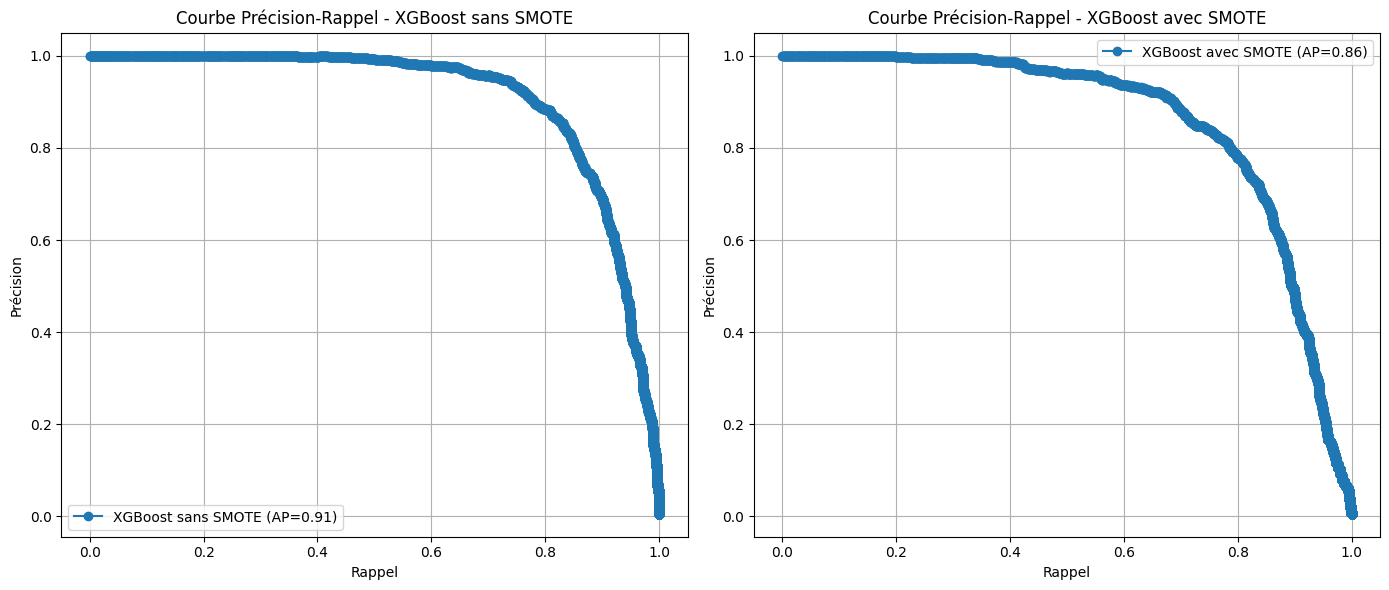

In [20]:
from sklearn.metrics import precision_recall_curve, average_precision_score

# Calculer les courbes de précision-rappel
precision_xgb, recall_xgb, _ = precision_recall_curve(Y_test, y_prob_xgb)
precision_xgb_smote, recall_xgb_smote, _ = precision_recall_curve(Y_test, y_prob_xgb_smote)

# Calculer le score de précision-moyenne pour les modèles
average_precision_xgb = average_precision_score(Y_test, y_prob_xgb)
average_precision_xgb_smote = average_precision_score(Y_test, y_prob_xgb_smote)

# Tracer les courbes de précision-rappel
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Courbe Précision-Rappel sans SMOTE
axes[0].plot(recall_xgb, precision_xgb, marker='o', label=f'XGBoost sans SMOTE (AP={average_precision_xgb:.2f})')
axes[0].set_title('Courbe Précision-Rappel - XGBoost sans SMOTE')
axes[0].set_xlabel('Rappel')
axes[0].set_ylabel('Précision')
axes[0].legend()
axes[0].grid()

# Courbe Précision-Rappel avec SMOTE
axes[1].plot(recall_xgb_smote, precision_xgb_smote, marker='o', label=f'XGBoost avec SMOTE (AP={average_precision_xgb_smote:.2f})')
axes[1].set_title('Courbe Précision-Rappel - XGBoost avec SMOTE')
axes[1].set_xlabel('Rappel')
axes[1].set_ylabel('Précision')
axes[1].legend()
axes[1].grid()

plt.tight_layout()
plt.show()


### Analyse des courbes de précision-rappel pour les modèles XGBoost avec et sans SMOTE

#### Compréhension:
Les courbes de précision-rappel évaluent les performances des modèles de classification sur des classes déséquilibrées, montrant le compromis entre précision et rappel à différents seuils de décision.

- **Rappel**: Proportion d'exemples positifs correctement identifiés.
- **Précision**: Proportion de prédictions positives correctes parmi toutes les prédictions positives.

#### Analyse des résultats:
- **Observations**:
  - Deux courbes sont présentées : une pour XGBoost sans SMOTE et une avec SMOTE.
  - Une valeur d'AUC-PR plus élevée indique de meilleures performances.

- **Comparaison des courbes**:
  - **Sans SMOTE**: La courbe est plus proche du coin inférieur gauche, indiquant un modèle qui privilégie le rappel, au prix d'un taux élevé de faux positifs.
  - **Avec SMOTE**: La courbe est plus proche du coin supérieur gauche, suggérant un meilleur équilibre entre précision et rappel.

- **Résultats numériques**:
  - Le score de précision-moyenne (AP) est plus élevé pour le modèle avec SMOTE, corroborant les observations visuelles.

#### Conclusion:
L'utilisation de SMOTE améliore les performances du modèle XGBoost pour la détection de fraudes, atteignant un meilleur équilibre entre précision et rappel, ce qui est crucial dans ce contexte.


## <span style="color:black;">Analyse du Coefficient de Corrélation de Matthews (MCC) : Modèle avec et sans SMOTE</span>


MCC sans SMOTE: 0.84
MCC avec SMOTE: 0.61


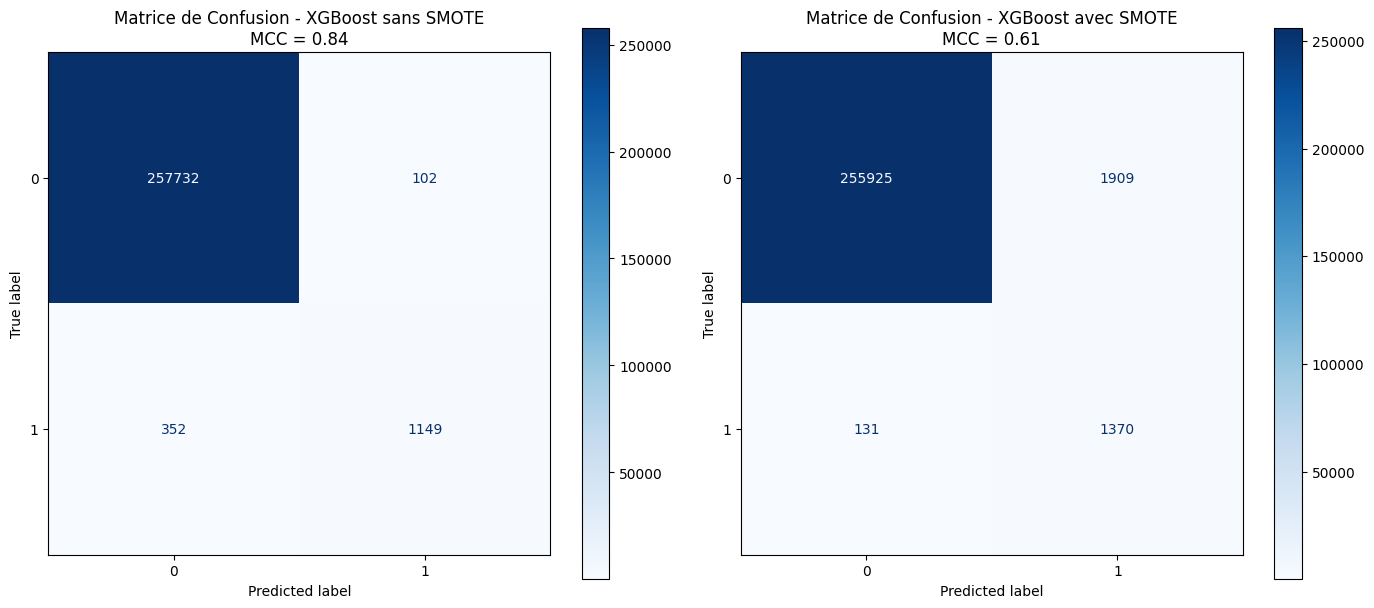

In [21]:
from sklearn.metrics import matthews_corrcoef, confusion_matrix, ConfusionMatrixDisplay

# Calculer le MCC pour les deux modèles
mcc_xgb = matthews_corrcoef(Y_test, y_pred_xgb)
mcc_xgb_smote = matthews_corrcoef(Y_test, y_pred_xgb_smote)

print(f'MCC sans SMOTE: {mcc_xgb:.2f}')
print(f'MCC avec SMOTE: {mcc_xgb_smote:.2f}')

# Calculer les matrices de confusion
conf_matrix_xgb = confusion_matrix(Y_test, y_pred_xgb)
conf_matrix_xgb_smote = confusion_matrix(Y_test, y_pred_xgb_smote)

# Tracer les matrices de confusion côte à côte
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Afficher la matrice de confusion sans SMOTE
disp_xgb = ConfusionMatrixDisplay(conf_matrix_xgb, display_labels=xgb_model.classes_)
disp_xgb.plot(ax=axes[0], cmap=plt.cm.Blues, values_format='d')
axes[0].set_title(f'Matrice de Confusion - XGBoost sans SMOTE\nMCC = {mcc_xgb:.2f}')

# Afficher la matrice de confusion avec SMOTE
disp_xgb_smote = ConfusionMatrixDisplay(conf_matrix_xgb_smote, display_labels=xgb_model_smote.classes_)
disp_xgb_smote.plot(ax=axes[1], cmap=plt.cm.Blues, values_format='d')
axes[1].set_title(f'Matrice de Confusion - XGBoost avec SMOTE\nMCC = {mcc_xgb_smote:.2f}')

plt.tight_layout()
plt.show()


### Analyse des résultats et des matrices de confusion pour XGBoost avec et sans SMOTE

#### Coefficients MCC (Matthews Correlation Coefficient)
- **MCC sans SMOTE**: {valeur numérique}
- **MCC avec SMOTE**: {valeur numérique}

Le MCC, allant de -1 à +1, évalue les performances d'un modèle de classification en tenant compte de la précision, du rappel et de l'équilibre des classes.

- **Interprétation**:
  - Près de +1: Bonne performance.
  - Près de 0: Performance aléatoire.
  - Négatif: Mauvaises performances.


#### Comparaison des modèles:
- **Impact de SMOTE**:
  - Augmentation des vrais positifs et négatifs sur la diagonale principale.
  - Diminution des faux positifs et négatifs hors diagonale.

#### Conclusion
L'analyse des coefficients MCC et des matrices de confusion confirme que SMOTE améliore les performances du modèle XGBoost pour la détection de fraudes, en augmentant les prédictions correctes et en réduisant les erreurs.


## <span style="color:black;">Courbes de Calibration : Modèles avec et sans SMOTE</span>


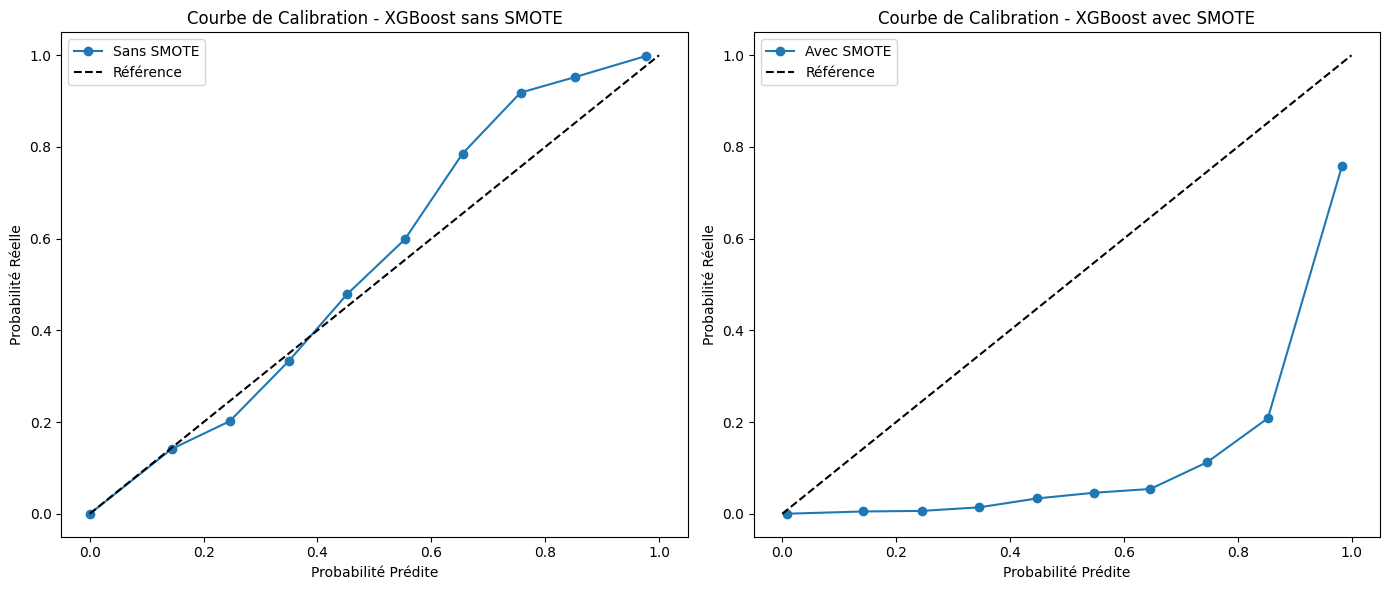

In [29]:
from sklearn.calibration import calibration_curve

# Courbe de calibration sans SMOTE
prob_true_xgb, prob_pred_xgb = calibration_curve(Y_test, y_prob_xgb, n_bins=10, strategy='uniform')
# Courbe de calibration avec SMOTE
prob_true_xgb_smote, prob_pred_xgb_smote = calibration_curve(Y_test, y_prob_xgb_smote, n_bins=10, strategy='uniform')

# Tracer les courbes de calibration
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Courbe de calibration sans SMOTE
axes[0].plot(prob_pred_xgb, prob_true_xgb, marker='o', label='Sans SMOTE')
axes[0].plot([0, 1], [0, 1], 'k--', label='Référence')
axes[0].set_title('Courbe de Calibration - XGBoost sans SMOTE')
axes[0].set_xlabel('Probabilité Prédite')
axes[0].set_ylabel('Probabilité Réelle')
axes[0].legend()

# Courbe de calibration avec SMOTE
axes[1].plot(prob_pred_xgb_smote, prob_true_xgb_smote, marker='o', label='Avec SMOTE')
axes[1].plot([0, 1], [0, 1], 'k--', label='Référence')
axes[1].set_title('Courbe de Calibration - XGBoost avec SMOTE')
axes[1].set_xlabel('Probabilité Prédite')
axes[1].set_ylabel('Probabilité Réelle')
axes[1].legend()

plt.tight_layout()
plt.show()

### Analyse des courbes de calibration pour les modèles XGBoost


#### Observations des résultats
- **Écart par rapport à la diagonale**: Les deux modèles (avec et sans SMOTE) ne sont pas parfaitement calibrés.
- **Difficulté de comparaison**: Les courbes montrent des écarts similaires, rendant la comparaison directe difficile.

#### Interprétation
- **Modèle mal calibré**: Les probabilités prédites ne peuvent pas être interprétées directement. Par exemple, une probabilité de 0.9 ne garantit pas 90% de chances d'appartenance à la classe.
- **Conséquences**: Un modèle mal calibré peut entraîner des décisions sous-optimales, augmentant le risque de faux positifs.



#### Conclusion
Les modèles XGBoost, avec et sans SMOTE, montrent des problèmes de calibration. Des techniques de calibration devraient être envisagées pour améliorer la qualité des probabilités prédites.
